In [42]:
import pandas as pd
from pandas import DataFrame

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from numpy import mean
from numpy import std
from numpy import percentile

import scipy
from scipy.stats import shapiro

import statsmodels
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

encoder = preprocessing.LabelEncoder()

In [43]:
data = pd.read_csv("dataset_Facebook.csv", delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

### Preprocessing

Algunos valores estan con valores NAN, entonces se remplazaran con ceros

In [45]:
data['like'].fillna(0,inplace=True)
data['share'].fillna(0,inplace=True)
data['Paid'].fillna(0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

Eliminar las variables que no seran utilizadas

In [46]:
ndata = data
ndata.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [47]:
ndata.drop(["Lifetime Post Total Reach",
"Lifetime Post Total Impressions",
"Lifetime Engaged Users",
"Lifetime Post Consumers",
"Lifetime Post Consumptions",
"Lifetime Post Impressions by people who have liked your Page",
"Lifetime Post reach by people who like your Page",
"Lifetime People who have liked your Page and engaged with your post",            
"comment",
"share",
"Total Interactions"], axis=1, inplace= True)
ndata['Type'] = encoder.fit_transform(ndata['Type'].astype(str))
ndata.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,like
0,139441,1,2,12,4,3,0.0,79.0
1,139441,2,2,12,3,10,0.0,130.0
2,139441,1,3,12,3,3,0.0,66.0
3,139441,1,2,12,2,10,1.0,1572.0
4,139441,1,2,12,2,3,0.0,325.0


In [ ]:
#### Delete outliers

[Text(0.5, 0, 'Paid post'), Text(0, 0.5, 'Number of Paid post')]

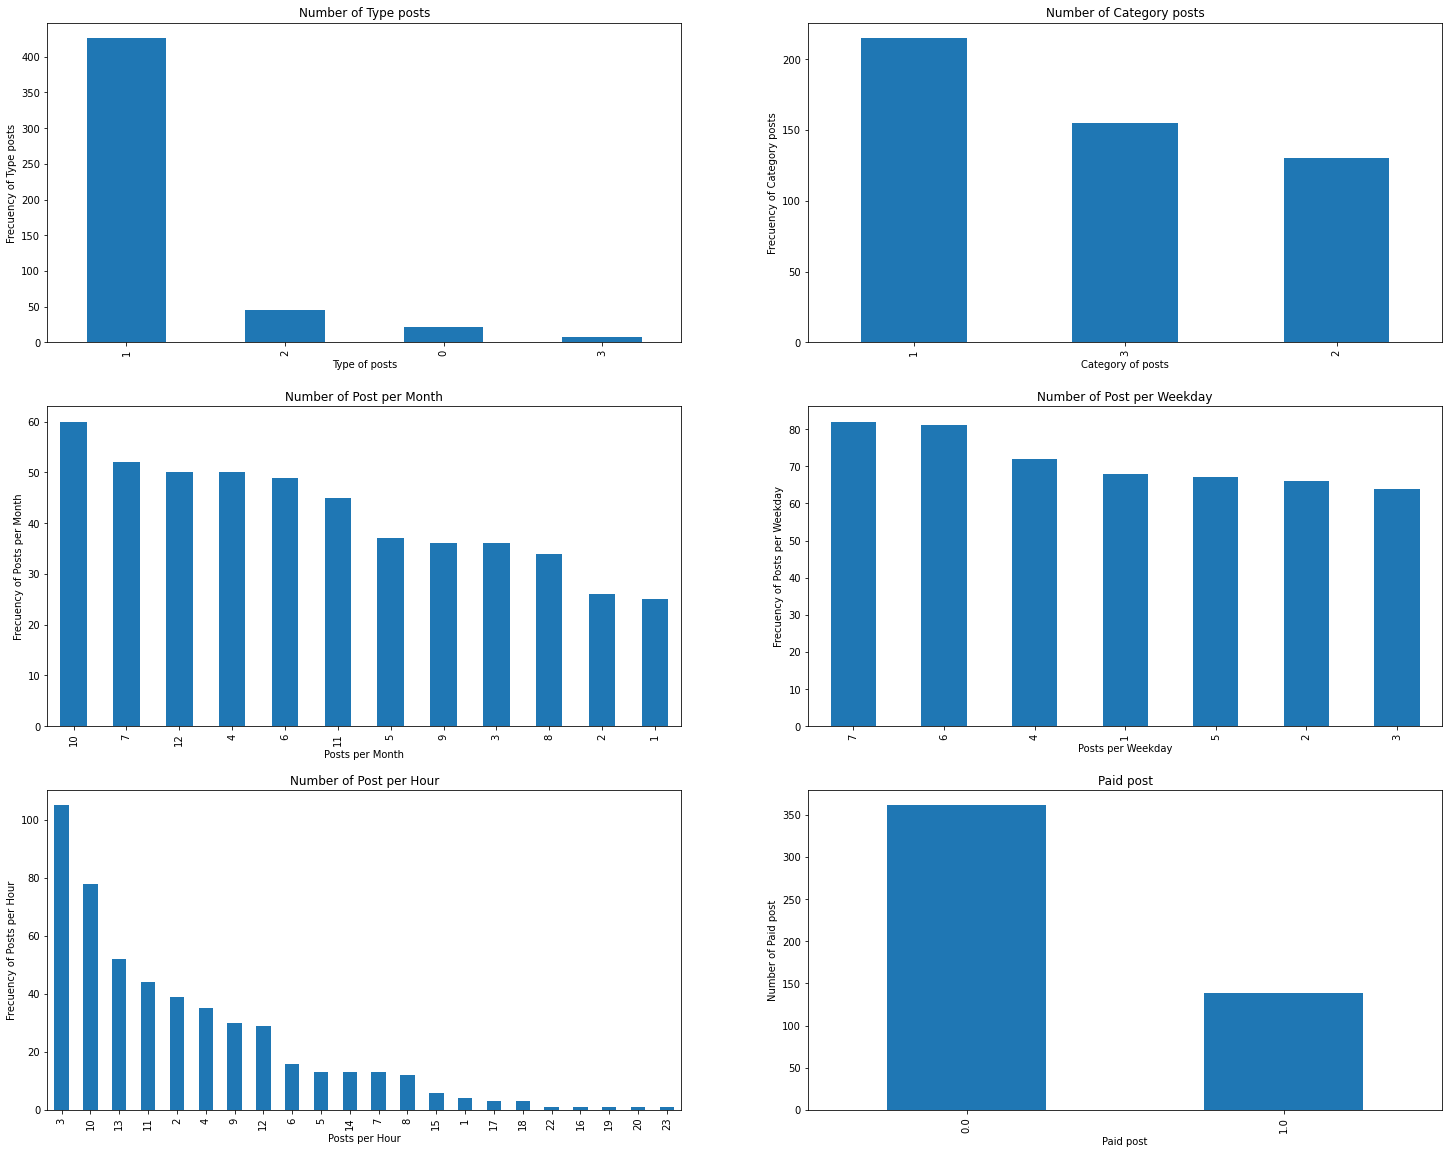

In [48]:
plt.figure(figsize=(25, 20))

plt.subplot(3,2,1)
plt1 = ndata['Type'].value_counts().plot(kind="bar")
plt.title("Number of Type posts")
plt1.set(xlabel="Type of posts", ylabel="Frecuency of Type posts")

plt.subplot(3,2,2)
plt1 = ndata["Category"].value_counts().plot(kind="bar")
plt.title("Number of Category posts")
plt1.set(xlabel="Category of posts", ylabel="Frecuency of Category posts")

plt.subplot(3,2,3)
plt1 = ndata["Post Month"].value_counts().plot(kind="bar")
plt.title("Number of Post per Month")
plt1.set(xlabel="Posts per Month", ylabel="Frecuency of Posts per Month")

plt.subplot(3,2,4)
plt1 = ndata["Post Weekday"].value_counts().plot(kind="bar")
plt.title("Number of Post per Weekday")
plt1.set(xlabel="Posts per Weekday", ylabel="Frecuency of Posts per Weekday")

plt.subplot(3,2,5)
plt1 = ndata["Post Hour"].value_counts().plot(kind="bar")
plt.title("Number of Post per Hour")
plt1.set(xlabel="Posts per Hour", ylabel="Frecuency of Posts per Hour")

plt.subplot(3,2,6)
plt1 = ndata["Paid"].value_counts().plot(kind="bar")
plt.title("Paid post")
plt1.set(xlabel="Paid post", ylabel="Number of Paid post")

In [49]:
q1 = ndata.quantile(0.25)
q3 = ndata.quantile(0.75)
IQR = q3 - q1
print(IQR)

Page total likes    23717.00
Type                    0.00
Category                2.00
Post Month              6.00
Post Weekday            4.00
Post Hour               8.00
Paid                    1.00
like                  131.25
dtype: float64


In [50]:
data_no_outliers = ndata[~((ndata < (q1 - 1.5 * IQR)) |(ndata > (q3 + 1.5 * IQR))).any(axis=1)]
data_no_outliers.shape
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  391 non-null    int64  
 1   Type              391 non-null    int64  
 2   Category          391 non-null    int64  
 3   Post Month        391 non-null    int64  
 4   Post Weekday      391 non-null    int64  
 5   Post Hour         391 non-null    int64  
 6   Paid              391 non-null    float64
 7   like              391 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 27.5 KB


(391, 8)

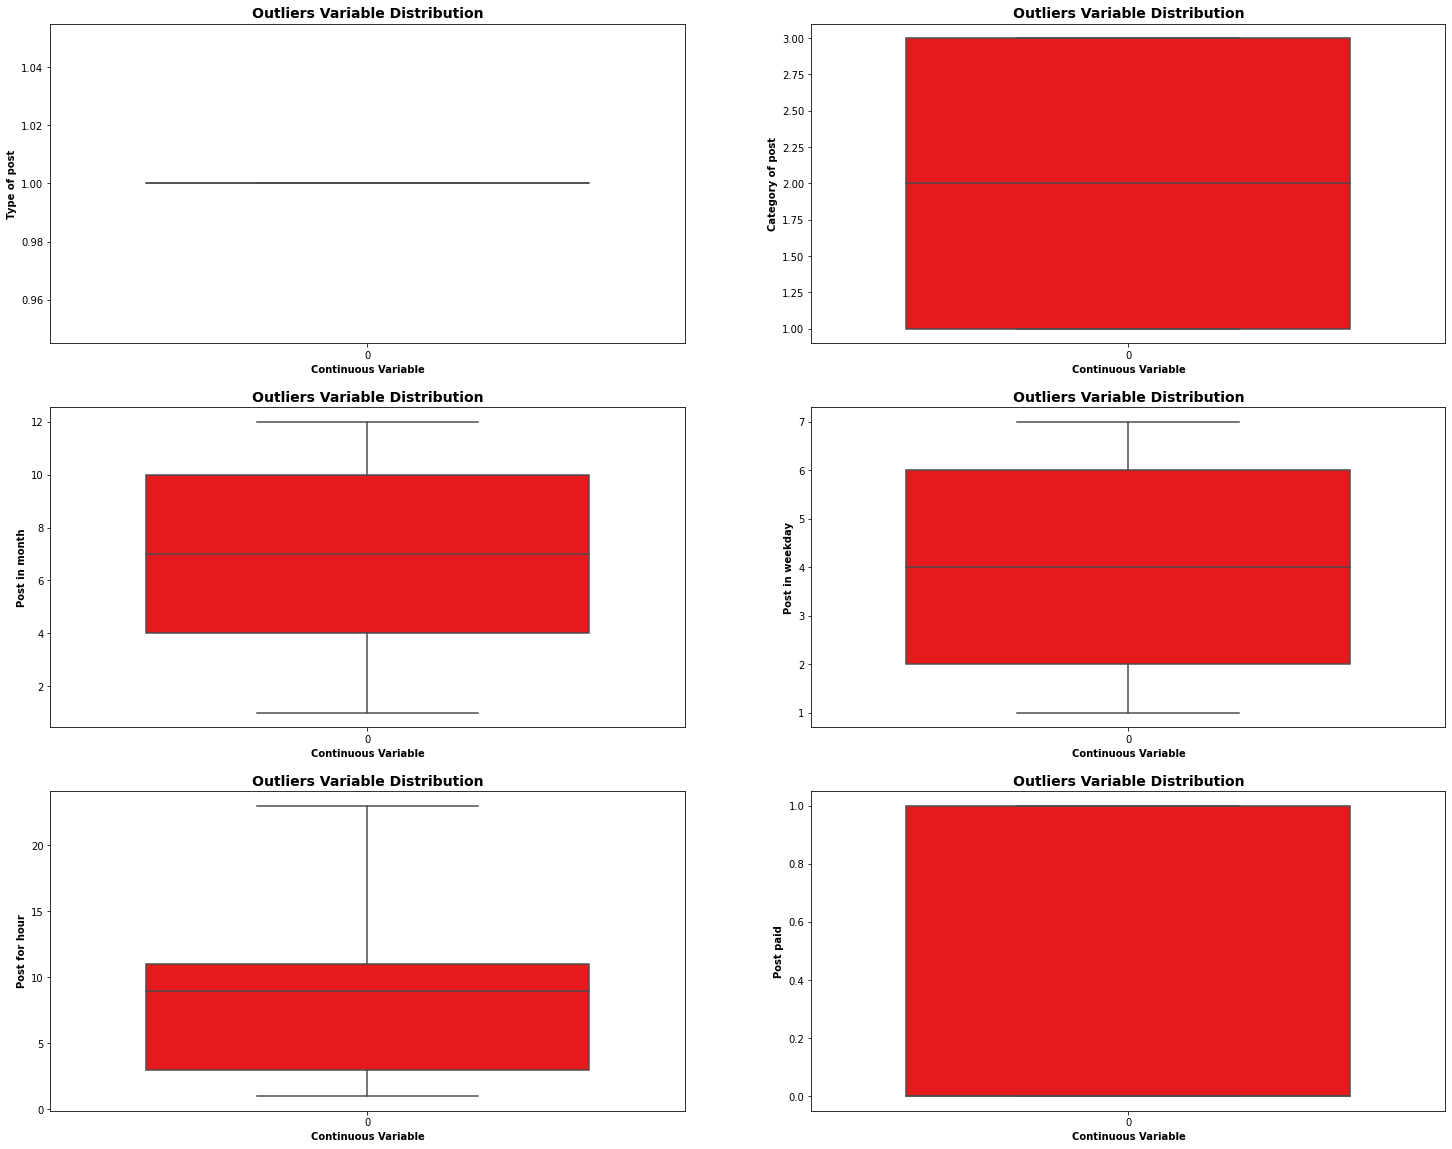

In [52]:
plt.figure(figsize=(25, 20))

plt.subplot(3,2,1)
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_no_outliers['Type'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Type of post", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_no_outliers.shape

plt.subplot(3,2,2)
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_no_outliers['Category'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Category of post", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_no_outliers.shape

plt.subplot(3,2,3)
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_no_outliers['Post Month'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Post in month", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_no_outliers.shape

plt.subplot(3,2,4)
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_no_outliers['Post Weekday'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Post in weekday", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_no_outliers.shape

plt.subplot(3,2,5)
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_no_outliers['Post Hour'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Post for hour", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_no_outliers.shape

plt.subplot(3,2,6)
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data_no_outliers['Paid'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Post paid", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data_no_outliers.shape

### a) Shapiro-Wilk 
#### Likes

In [53]:
data_mean, data_std = mean(data_no_outliers['like']), std(data_no_outliers['like'])

In [54]:
print(shapiro(data_no_outliers['like']))

ShapiroResult(statistic=0.92207270860672, pvalue=2.2600754004831886e-13)


/home/bryan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 4000.0)

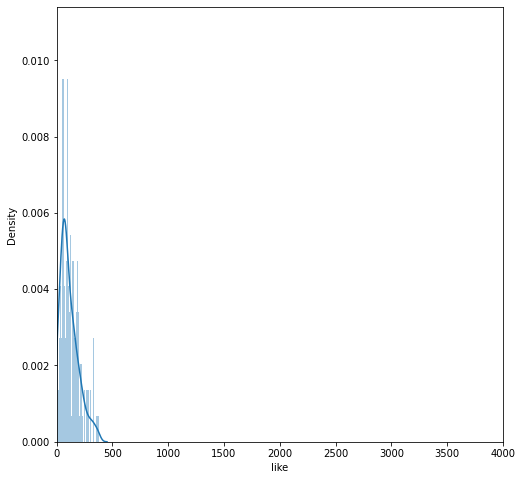

In [61]:
sns.distplot(data_no_outliers['like'],bins=100)
plt.xlim(0,4000)

#### Comparacion de datos con outliers vs no outliers

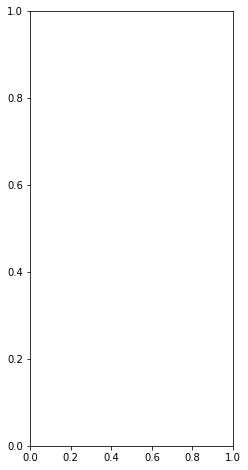

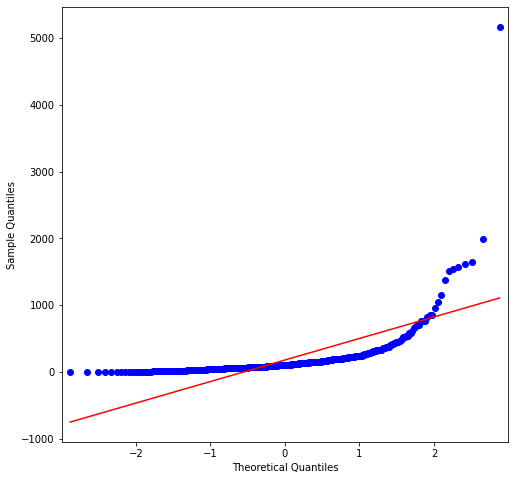

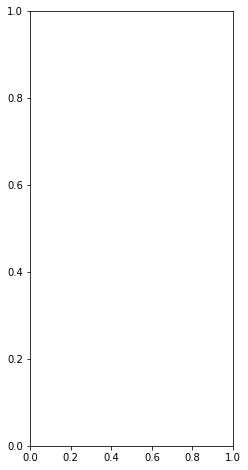

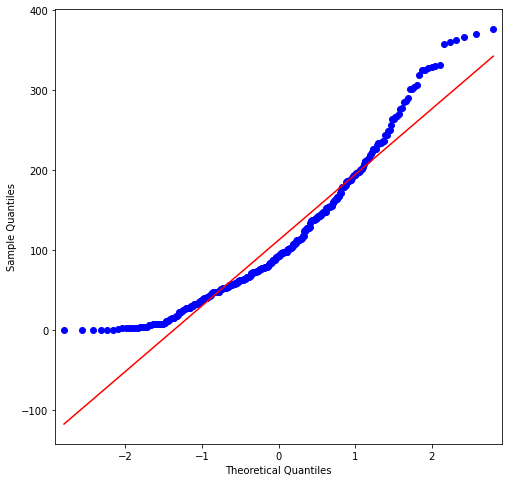

In [63]:
plt.subplot(1,2,1)
qqplot(ndata['like'], line='s')
plt.show()
plt.subplot(1,2,2)
qqplot(data_no_outliers['like'], line='s')
plt.show()

### b) Transformaciones

Transformar datos con outliers

In [64]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
ndata = pipeline.fit_transform(ndata)

In [65]:
dataset = DataFrame(ndata)
dataset.head()

,0,1,2,3,4,5,6,7
0,1.26774,-0.104880,0.320848,1.519399,-0.074479,-1.137386,-0.620517,-0.428788
1,1.26774,2.005007,0.320848,1.519399,-0.567301,0.553964,-0.620517,0.150361
2,1.26774,-0.104880,1.231389,1.519399,-0.567301,-1.137386,-0.620517,-0.600540
3,1.26774,-0.104880,0.320848,1.519399,-1.059834,0.553964,1.611559,2.333561
4,1.26774,-0.104880,0.320848,1.519399,-1.059834,-1.137386,-0.620517,1.428962


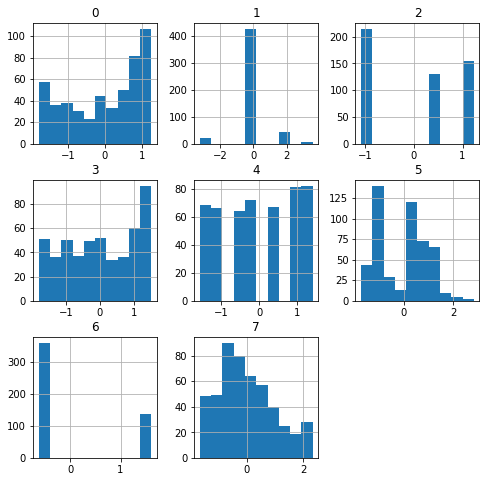

In [66]:
dataset.hist()
plt.show()

Tranformar datos sin outliers

In [67]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_no_outliers = pipeline.fit_transform(data_no_outliers)

ValueError: Data must not be constant.

In [ ]:
data_transf = DataFrame(data_no_outliers)
data_transf.head()

In [ ]:
data_transf.hist()
plt.show()